# Logistics Analysis

### Tasks
###### The effect of the following four on shipping quality will be analyzed.
1. Distance between sellers and customers
2. Product's size and volume
3. Freight value
4. Product category

- The meaning of 'shipping_limit_date' column is not clear. It will be studied by comparing with 'order_approved_at' and 'order_delivered_carrier_date'

### Data
- olist_orders_dataset.csv
- olist_sellers_dataset.csv
- olist_customers_dataset.csv
- olist_geolocation_dataset.csv
- olist_order_items_dataset.csv

In [1]:
# 
!pip install missingno==0.4.2
!pip install squarify==0.4.3
!pip install jedi==0.17.2
%config Completer.use_jedi = False

In [2]:
# import libraries

import pandas as pd
import numpy as np
from zipfile import ZipFile


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify #treemap


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Load
df_customers = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_customers_dataset.csv?raw=true')
df_order_payments = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_order_payments_dataset.csv?raw=true')
df_order_reviews = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_order_reviews_dataset.csv?raw=true')
df_orders = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_orders_dataset.csv?raw=true')
df_products = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_products_dataset.csv?raw=true')
df_sellers = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/raw/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_sellers_dataset.csv')
df_category_translation = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/raw/main/Brazilian%20E-Commerce%20Public%20Dataset/product_category_name_translation.csv')
df_order_items = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_order_items_dataset.csv?raw=true')

# 'olist_geolocation_dataset.csv' is too big. Stored by splitting into 2. 
df_geolocation_1 = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_geolocation_dataset_1.csv?raw=true')
df_geolocation_2 = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_geolocation_dataset_2.csv?raw=true')
df_geolocation = pd.concat([df_geolocation_1, df_geolocation_2], ignore_index=True)

## [Pre-Task] What is 'shipping_limit_date'?
#### Compare with order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

In [4]:
# df_order_itmes
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# df_orders
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# merge two tables to check datetime info
temp = pd.merge(df_orders, df_order_items, how='inner', on=['order_id'])
temp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [7]:
# check no. of null
temp.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [8]:
# remove all null
temp = temp.dropna(axis=0)
temp.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [9]:
# Change the order of columns to easily compare datetime columns
temp = temp[['order_id',
 'order_status',
 'shipping_limit_date',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_purchase_timestamp',
 'order_approved_at',
 'customer_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'price',
 'freight_value']]

temp.head()

,order_id,order_status,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp,order_approved_at,customer_id,order_item_id,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-06 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10-02 11:07:15,9ef432eb6251297304e76186b10a928d,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-30 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07-26 03:24:27,b0830fb4747a6c6d20dea0b8c802d7ef,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-13 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08-08 08:55:23,41ce2a54c0b03bf3443c3d931a367089,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-23 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11-18 19:45:59,f88197465ea7920adcdbec7375364d82,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-19 20:31:37,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02-13 22:20:29,8ab97904e6daea8866dbdbc4fb7aad2c,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [10]:
# Convert to datetime
temp['shipping_limit_date'] = pd.to_datetime(temp['shipping_limit_date'])
temp['order_delivered_carrier_date'] = pd.to_datetime(temp['order_delivered_carrier_date'])
temp['order_delivered_customer_date'] = pd.to_datetime(temp['order_delivered_customer_date'])
temp['order_estimated_delivery_date'] = pd.to_datetime(temp['order_estimated_delivery_date'])
temp['order_purchase_timestamp'] = pd.to_datetime(temp['order_purchase_timestamp'])
temp['order_approved_at'] = pd.to_datetime(temp['order_approved_at'])

temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110180 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   order_status                   110180 non-null  object        
 2   shipping_limit_date            110180 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 4   order_delivered_customer_date  110180 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 6   order_purchase_timestamp       110180 non-null  datetime64[ns]
 7   order_approved_at              110180 non-null  datetime64[ns]
 8   customer_id                    110180 non-null  object        
 9   order_item_id                  110180 non-null  int64         
 10  product_id                     110180 non-null  object        
 11  

In [11]:
temp.sample(30)

,order_id,order_status,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp,order_approved_at,customer_id,order_item_id,product_id,seller_id,price,freight_value
50060,43d640d9d8add3920e35acc0d8ca9411,delivered,2017-11-27 18:39:31,2017-11-22 18:38:55,2017-11-29 01:36:59,2017-12-13,2017-11-21 18:31:03,2017-11-21 18:39:31,a1cdd0992516e0e8a9c90b38965b47fe,1,e0d64dcfaa3b6db5c54ca298ae101d05,4869f7a5dfa277a7dca6462dcf3b52b2,170.00,21.68
30513,391b367d6be6ee89d19e3e314606012c,delivered,2018-03-22 16:10:36,2018-03-21 00:41:47,2018-04-10 15:46:54,2018-04-09,2018-03-16 15:59:23,2018-03-16 16:10:36,c3690107fafa1e4395f223bdbfe389fd,1,5c92f9ec6027c92a5293a46e9175e817,4be6b962d83299498bae2190f95d6566,32.90,18.23
85885,e87eab6d3c69146b0c36c905a34600e7,delivered,2018-01-12 00:06:40,2018-01-08 21:19:38,2018-01-15 12:47:02,2018-02-05,2018-01-06 23:50:14,2018-01-07 00:06:40,81112d3c8ff7d1dc7b26c0f2052012ab,1,59391e840980a4bb6df5f44d3d734df7,bba74270a87732727b5a3b4fd9ac1c39,49.99,15.79
20273,cdd4fd6abe91d418574b7001b682cf87,delivered,2017-05-31 21:25:15,2017-05-29 13:20:18,2017-06-02 14:37:59,2017-06-20,2017-05-26 21:17:51,2017-05-26 21:25:15,076f94b60104b86cb0ac29a9bc1dab6a,1,57aae7271c7c24614b0d663c6df83f35,d05ae8f7a5bd1d2a690a44cd079e4e27,252.00,15.51
59646,303cefa0f5b9ed6af793756df252eff5,delivered,2018-04-17 11:10:53,2018-04-11 23:03:34,2018-04-17 20:20:44,2018-05-07,2018-04-11 10:48:18,2018-04-11 11:10:53,cf4dbbb52c23ef9d9fbf701b2919afee,1,02ee0862685e90b57cc241b7c9885f95,fe2032dab1a61af8794248c8196565c9,209.00,16.21
22642,68a3f6a339f98376fcc5983976802006,delivered,2018-06-19 12:33:03,2018-06-25 14:16:00,2018-06-29 13:18:37,2018-07-03,2018-06-13 12:09:56,2018-06-13 12:37:11,95be6558ef5d788291a4bfa88cb96b9b,1,f0788219c3d63c6183bbca7699ca9608,0a198e95d32b1be2da9424c962a6ebfa,69.99,16.68
50712,1915bc319651dfbfa6563a6d19d558c5,delivered,2017-05-24 14:30:15,2017-05-22 06:11:10,2017-05-24 15:53:06,2017-05-31,2017-05-18 14:15:54,2017-05-18 14:31:21,093cc8dd94c7aae7b33742a5ff3be232,1,525a5744fb5d26e4035d0610446900c5,f41ce2e25237f9092cd8e6e7516c7a2f,58.00,7.78
65723,38cafbf33f703cea7d7266c456a3fdf3,delivered,2018-02-27 13:50:18,2018-02-22 16:04:44,2018-03-09 16:02:33,2018-03-14,2018-02-21 13:26:13,2018-02-21 13:50:18,6a7aa1cff48701b0ece001860af2ef33,1,9b89ab91efbb4750c39864ed0262711f,4992e76a42cb3aad7a7047e0d3d7e729,39.90,15.11
6166,71e22e2d99081d6dc07d9627bb85969e,delivered,2018-01-30 22:56:25,2018-01-25 15:32:52,2018-01-29 16:58:48,2018-02-19,2018-01-24 22:46:55,2018-01-24 22:56:25,0b6c2ee27dbe0bcbffd424f2ddedd222,2,65610bb38e3ee3e20a94885411c3feec,681fce914360217db47784ae28905a96,114.00,28.36
22058,9974f55fe60de80215db1be13064ee66,delivered,2018-05-09 21:11:24,2018-05-04 14:39:00,2018-05-22 17:58:51,2018-06-06,2018-05-03 20:54:47,2018-05-03 21:11:24,2c294c9fdd5d9b63c26e6fb27a39475e,1,8c292ca193d326152e335d77176746f0,7e1fb0a3ebfb01ffb3a7dae98bf3238d,152.00,26.43


#### From the above table, 'shipping_limit_date' is the due date for sellers to ship the ordered items.

'shipping_limit_date' is mostly earlier than 'order_delivered_carrier_date', which means that most sellers meet the shipping limit date well. However, breaking shipping deadline does not always lead to late delivery to customers.

## [Task 1] Distance between sellers and customers
#### What is the impact of distance between sellers and customers on delivery?
- Does it affect the accuracy of predicting delivery time??
- Does it affect delivery lead time?

In [12]:
# To calculate the distance between sellers and customers
    # Get customer location data (customer_id, order_id, customer_zip_code_prefix, lat, lng)
    # Get seller location data (seller_id, order_id, seller_zip_code_prefix, lat, lng)
    # Get table with distance between customer and seller (order_id, customer_id, seller_id, distance, order_estimated_delivery_date, order_delivered_customer_date, order_approved_at)

In [13]:
# one zipcode has multiple combinations of latitude, longtitude
# one zipcode will get only one combination of mean latitude and mean longtitude for convenience

df_geolocation_simple = pd.DataFrame(df_geolocation.groupby(by=['geolocation_zip_code_prefix'])['geolocation_lat', 'geolocation_lng'].mean().reset_index())
df_geolocation_simple.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


<b> Customer's Location Table <b>

In [14]:
# Get customer location data
print(df_customers.shape)
df_customers.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [15]:
temp_cust_zip = df_customers[['customer_id', 'customer_zip_code_prefix']]
temp_cust_zip.columns = ['customer_id', 'geolocation_zip_code_prefix']
temp_cust_zip

,customer_id,geolocation_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409
1,18955e83d337fd6b2def6b18a428ac77,9790
2,4e7b3e00288586ebd08712fdd0374a03,1151
3,b2b6027bc5c5109e529d4dc6358b12c3,8775
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937
99437,e7b71a9017aa05c9a7fd292d714858e8,6764
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115
99439,56b18e2166679b8a959d72dd06da27f9,92120


In [16]:
temp_cust_geo = pd.merge(temp_cust_zip, df_geolocation_simple, how='inner', on=['geolocation_zip_code_prefix'])
temp_cust_geo

,customer_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,-20.498489,-47.396929
1,5dca924cc99eea2dc5ba40d11ec5dd0f,14409,-20.498489,-47.396929
2,661897d4968f1b59bfff74c7eb2eb4fc,14409,-20.498489,-47.396929
3,702b62324327ccba20f1be3465426437,14409,-20.498489,-47.396929
4,bdf997bae7ca819b0415f5174d6b4302,14409,-20.498489,-47.396929
...,...,...,...,...
99158,0b7a30ba373aeb55cf28add5b5477956,87145,-23.501806,-52.150926
99159,ff6b440b2465bfaef05c675efb48cd15,98860,-28.527590,-54.145960
99160,3f7029d9b98a47370cd5f3a97adcbccd,5538,-23.588483,-46.737908
99161,d9110683c7a282144e9fc97660026a28,74980,-16.822735,-49.248175


In [17]:
df_order_delivered = pd.DataFrame(df_orders.loc[df_orders['order_status'] == 'delivered'])
df_order_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [18]:
get_cust_geo = pd.merge(temp_cust_geo, df_order_delivered, how='right', on=['customer_id'])

In [19]:
get_cust_geo

,customer_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,3149.0,-23.576983,-46.587161,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,b0830fb4747a6c6d20dea0b8c802d7ef,47813.0,-12.177924,-44.660711,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,41ce2a54c0b03bf3443c3d931a367089,75265.0,-16.745150,-48.514783,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,f88197465ea7920adcdbec7375364d82,59296.0,-5.774190,-35.271143,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,8ab97904e6daea8866dbdbc4fb7aad2c,9195.0,-23.676370,-46.514627,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,12209.0,-23.178000,-45.883818,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
96474,1fca14ff2861355f6e5f14306ff977a7,11722.0,-24.001500,-46.449864,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
96475,1aa71eb042121263aafbe80c1b562c9c,45920.0,-17.898358,-39.373630,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
96476,b331b74b18dc79bcdf6532d51e1637c1,28685.0,-22.562825,-42.694574,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [20]:
get_cust_geo.isnull().sum()

customer_id                        0
geolocation_zip_code_prefix      264
geolocation_lat                  264
geolocation_lng                  264
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 14
order_delivered_carrier_date       2
order_delivered_customer_date      8
order_estimated_delivery_date      0
dtype: int64

In [21]:
get_cust_geo = get_cust_geo.dropna(axis=0)
get_cust_geo

,customer_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,3149.0,-23.576983,-46.587161,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,b0830fb4747a6c6d20dea0b8c802d7ef,47813.0,-12.177924,-44.660711,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,41ce2a54c0b03bf3443c3d931a367089,75265.0,-16.745150,-48.514783,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,f88197465ea7920adcdbec7375364d82,59296.0,-5.774190,-35.271143,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,8ab97904e6daea8866dbdbc4fb7aad2c,9195.0,-23.676370,-46.514627,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,12209.0,-23.178000,-45.883818,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
96474,1fca14ff2861355f6e5f14306ff977a7,11722.0,-24.001500,-46.449864,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
96475,1aa71eb042121263aafbe80c1b562c9c,45920.0,-17.898358,-39.373630,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
96476,b331b74b18dc79bcdf6532d51e1637c1,28685.0,-22.562825,-42.694574,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


<b> Seller's Location Table <b>

In [22]:
# Get seller location data
print(df_sellers.shape)
df_sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [23]:
temp_seller_zip = df_sellers[['seller_id', 'seller_zip_code_prefix']]
temp_seller_zip.columns = ['seller_id', 'geolocation_zip_code_prefix']
temp_seller_zip

,seller_id,geolocation_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111
3091,f8201cab383e484733266d1906e2fdfa,88137
3092,74871d19219c7d518d0090283e03c137,4650
3093,e603cf3fec55f8697c9059638d6c8eb5,96080


In [24]:
temp_seller_geo = pd.merge(temp_seller_zip, df_geolocation_simple, how='inner', on=['geolocation_zip_code_prefix'])
temp_seller_geo

,seller_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337
1,e0eabded302882513ced4ea3eb0c7059,13023,-22.893848,-47.061337
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.383437,-46.947927
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.909572,-43.177703
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,-22.909572,-43.177703
...,...,...,...,...
3083,f1fdf2d13186575751aa25876536d85c,5314,-23.530647,-46.736453
3084,98dddbc4601dd4443ca174359b237166,87111,-23.448041,-51.869960
3085,74871d19219c7d518d0090283e03c137,4650,-23.657851,-46.676925
3086,e603cf3fec55f8697c9059638d6c8eb5,96080,-31.751072,-52.323202


In [25]:
get_seller_geo = pd.merge(temp_seller_geo, df_order_items, how='inner', on=['seller_id'])
get_seller_geo

,seller_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.893848,-47.061337,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42
3,e0eabded302882513ced4ea3eb0c7059,13023,-22.893848,-47.061337,02f4dd90ba0feb8ec394cac05862d2b5,1,f3c62fde9d2e2acf6c7c46648571c070,2018-06-06 16:15:29,79.9,51.06
4,e0eabded302882513ced4ea3eb0c7059,13023,-22.893848,-47.061337,049b358d74d74c40f7305eb4a4bc378e,1,f3c62fde9d2e2acf6c7c46648571c070,2018-05-10 12:13:16,79.9,15.44
...,...,...,...,...,...,...,...,...,...,...
112392,e603cf3fec55f8697c9059638d6c8eb5,96080,-31.751072,-52.323202,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.0,16.05
112393,e603cf3fec55f8697c9059638d6c8eb5,96080,-31.751072,-52.323202,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.0,10.96
112394,e603cf3fec55f8697c9059638d6c8eb5,96080,-31.751072,-52.323202,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.0,16.05
112395,e603cf3fec55f8697c9059638d6c8eb5,96080,-31.751072,-52.323202,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27.0,12.48


In [26]:
get_seller_geo.isnull().sum()

seller_id                      0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
order_id                       0
order_item_id                  0
product_id                     0
shipping_limit_date            0
price                          0
freight_value                  0
dtype: int64

In [27]:
get_seller_geo.shape

(112397, 10)

<b> Distance between Customer and Seller <b>

In [28]:
# Distance formula
    # 6371.01 * acos(sin(cust_lat)*sin(seller_lat) + cos(cust_lat)*cos(seller_lat)*cos(cust_lng - seller_lng))

In [29]:
temp1 = get_cust_geo[['customer_id', 'order_id', 'geolocation_lat', 'geolocation_lng']]
temp1.columns = ['customer_id', 'order_id', 'cust_lat', 'cust_lng']
temp2 = get_seller_geo[['seller_id', 'order_id', 'geolocation_lat', 'geolocation_lng']]
temp2.columns = ['seller_id', 'order_id', 'seller_lat', 'seller_lng']
df_cust_seller_dist = pd.merge(temp1, temp2, how='inner', on=['order_id'])

In [30]:
df_cust_seller_dist.head()

,customer_id,order_id,cust_lat,cust_lng,seller_id,seller_lat,seller_lng
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,-23.576983,-46.587161,3504c0cb71d7fa48d967e0e4c94d59d9,-23.680729,-46.444238
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,-12.177924,-44.660711,289cdb325fb7e7f891c38608bf9e0962,-19.807681,-43.980427
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,-16.745150,-48.514783,4869f7a5dfa277a7dca6462dcf3b52b2,-21.363502,-48.229601
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,-5.774190,-35.271143,66922902710d126a0e7d26b0e3805106,-19.837682,-43.924053
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,-23.676370,-46.514627,2c9e548be18521d1c43cde1c582c6de8,-23.543395,-46.262086


In [31]:
from math import radians, sin, cos, acos

In [32]:
df_cust_seller_dist['rad(cust_lat)'] = df_cust_seller_dist['cust_lat'].apply(lambda x: radians(x))
df_cust_seller_dist['rad(cust_lng)'] = df_cust_seller_dist['cust_lng'].apply(lambda x: radians(x))
df_cust_seller_dist['rad(seller_lat)'] = df_cust_seller_dist['seller_lat'].apply(lambda x: radians(x))
df_cust_seller_dist['rad(seller_lng)'] = df_cust_seller_dist['seller_lng'].apply(lambda x: radians(x))
                                                                                 

In [33]:
df_cust_seller_dist['sin(r_cust_lat)'] = df_cust_seller_dist['rad(cust_lat)'].apply(lambda x: sin(radians(x)))
df_cust_seller_dist['sin(r_seller_lat)'] = df_cust_seller_dist['rad(seller_lat)'].apply(lambda x: sin(radians(x)))
df_cust_seller_dist['cos(r_cust_lat)'] = df_cust_seller_dist['rad(cust_lat)'].apply(lambda x: cos(radians(x)))
df_cust_seller_dist['cos(r_seller_lat)'] = df_cust_seller_dist['rad(seller_lat)'].apply(lambda x: cos(radians(x)))

In [34]:
df_cust_seller_dist['clng-slng'] = df_cust_seller_dist['rad(cust_lng)'] - df_cust_seller_dist['rad(seller_lng)']

In [35]:
df_cust_seller_dist['cos(clng-slng)'] = df_cust_seller_dist['clng-slng'].apply(lambda x: cos(x))

In [36]:
# 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
df_cust_seller_dist['distance'] = 6371.01*np.arccos((df_cust_seller_dist['sin(r_cust_lat)']*df_cust_seller_dist['sin(r_seller_lat)']) + (df_cust_seller_dist['cos(r_cust_lat)']*df_cust_seller_dist['cos(r_seller_lat)']*df_cust_seller_dist['cos(clng-slng)']))

In [37]:
col = ['order_id', 'customer_id', 'seller_id', 'distance']
df_cust_seller_dist = df_cust_seller_dist[col]
df_cust_seller_dist.head()

,order_id,customer_id,seller_id,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,15.893201
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,77.078936
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,32.952717
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,962.540086
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,28.081854


<b> Gather meaningful information <b>

In [158]:
distance_delivery = pd.merge(df_cust_seller_dist, get_cust_geo, how='inner', on=['order_id'])
distance_delivery.dropna(axis=0, inplace=True)

In [159]:
col = ['order_id', 'distance', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_approved_at']
distance_delivery = distance_delivery[col]
distance_delivery.drop_duplicates(inplace = True)
distance_delivery.reset_index(drop=True, inplace = True)
distance_delivery.shape

(97147, 5)

In [160]:
distance_delivery['order_delivered_customer_date'] = pd.to_datetime(distance_delivery['order_delivered_customer_date'])
distance_delivery['order_estimated_delivery_date'] = pd.to_datetime(distance_delivery['order_estimated_delivery_date'])
distance_delivery['order_approved_at'] = pd.to_datetime(distance_delivery['order_approved_at'])

In [161]:
distance_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97147 entries, 0 to 97146
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97147 non-null  object        
 1   distance                       97147 non-null  float64       
 2   order_delivered_customer_date  97147 non-null  datetime64[ns]
 3   order_estimated_delivery_date  97147 non-null  datetime64[ns]
 4   order_approved_at              97147 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 3.7+ MB


In [162]:
# Accuracy of estimated delivery date
    ## negative value : late delivery
    ## positive value : early delivery
distance_delivery['estimated_delivery_date_error(d)'] = distance_delivery['order_estimated_delivery_date'] - distance_delivery['order_delivered_customer_date']
distance_delivery['estimated_delivery_date_error(d)'] = distance_delivery['estimated_delivery_date_error(d)'] / pd.Timedelta(1, unit='d')
distance_delivery['estimated_delivery_date_error(d)'] = distance_delivery['estimated_delivery_date_error(d)'].astype('timedelta64[D]')
distance_delivery['estimated_delivery_date_error(d)'] = distance_delivery['estimated_delivery_date_error(d)'].apply(lambda x: x.days)
distance_delivery.describe()

,distance,estimated_delivery_date_error(d)
count,97147.000000,97147.000000
mean,374.302731,11.030891
std,353.616880,10.017862
min,0.000000,-188.000000
25%,89.335564,6.000000
50%,290.285861,12.000000
75%,541.245089,16.000000
max,4526.171055,146.000000


In [150]:
# Check the min, max, accurate case
print("No. of Cases that %ddirelivered on the exact Date")
distance_delivery[distance_delivery['estimated_delivery_date_error(d)']==0]

No. of Cases that %ddirelivered on the exact Date


,order_id,distance,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at,estimated_delivery_date_error(d)
36,8563039e855156e48fccee4d611a3196,269.865987,2018-03-20 00:59:25,2018-03-20,2018-02-17 16:15:34,0
90,6d25592267349b322799e2beb687871e,14.589615,2018-08-29 12:40:53,2018-08-30,2018-08-28 04:10:18,0
91,6d25592267349b322799e2beb687871e,14.589615,2018-08-29 12:40:53,2018-08-30,2018-08-28 04:10:18,0
133,ee0c5c649e17808bc4a363d3a80ebf85,346.710846,2018-02-20 15:25:04,2018-02-21,2018-01-30 08:13:43,0
134,ee0c5c649e17808bc4a363d3a80ebf85,346.710846,2018-02-20 15:25:04,2018-02-21,2018-01-30 08:13:43,0
...,...,...,...,...,...,...
109276,ad369c5a6bd2534d48420216de8fd8f5,713.274765,2018-02-21 17:46:45,2018-02-21,2018-01-30 15:31:50,0
109333,ad005b5bdc8ec1f3085f0967211207d1,12.541821,2018-08-08 16:23:48,2018-08-09,2018-08-05 11:05:07,0
109470,0c699835432f5ca06e878ed73f893b05,224.108774,2017-05-17 10:04:51,2017-05-17,2017-04-26 16:10:17,0
109587,079c9f53e6c3253320db701a645b0b9a,37.709858,2018-08-16 17:51:09,2018-08-17,2018-08-09 20:50:17,0


In [163]:
print("Case of the biggest error in the estimated delivery date (Late Delivery)")
distance_delivery[distance_delivery['estimated_delivery_date_error(d)']==-188]

Case of the biggest error in the estimated delivery date (Late Delivery)


,order_id,distance,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at,estimated_delivery_date_error(d)
54352,1b3190b2dfa9d789e1f14c05b647a14a,348.487763,2018-09-19 23:24:07,2018-03-15,2018-02-23 15:16:14,-188


In [164]:
print("Case of the biggest error in the estimated delivery date (Early Delivery)")
distance_delivery[distance_delivery['estimated_delivery_date_error(d)']==146]

Case of the biggest error in the estimated delivery date (Early Delivery)


,order_id,distance,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at,estimated_delivery_date_error(d)
39188,0607f0efea4b566f1eb8f7d3c2397320,55.355182,2018-03-09 23:36:47,2018-08-03,2018-03-06 09:55:47,146


In [165]:
# Delivery lead time
    ## from payment approved date to delivery date
distance_delivery['delivery_leadtime(d)'] = distance_delivery['order_delivered_customer_date'] - distance_delivery['order_approved_at']
distance_delivery['delivery_leadtime(d)'] = distance_delivery['delivery_leadtime(d)'] / pd.Timedelta(1, unit='d')
distance_delivery['delivery_leadtime(d)'] = distance_delivery['delivery_leadtime(d)'].astype('timedelta64[D]')
distance_delivery['delivery_leadtime(d)'] = distance_delivery['delivery_leadtime(d)'].apply(lambda x: x.days)
distance_delivery.describe()

,distance,estimated_delivery_date_error(d),delivery_leadtime(d)
count,97147.000000,97147.000000,97147.000000
mean,374.302731,11.030891,11.588798
std,353.616880,10.017862,9.487647
min,0.000000,-188.000000,-6.000000
25%,89.335564,6.000000,6.000000
50%,290.285861,12.000000,9.000000
75%,541.245089,16.000000,15.000000
max,4526.171055,146.000000,208.000000


In [166]:
# negative value for delivery_leadtime does not make sense. 
distance_delivery[distance_delivery['delivery_leadtime(d)']==-6]

,order_id,distance,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at,estimated_delivery_date_error(d),delivery_leadtime(d)
30502,bc4854efd86d9f42140c951c595d20c1,3.615581,2017-09-06 22:15:45,2017-09-20,2017-09-13 22:00:51,13,-6


- order_id 'bc4854efd86d9f42140c951c595d20c1' had been delivered before payment was approved.
- Or, it could be just data input error

<b> Interpretation and Visualization <b>

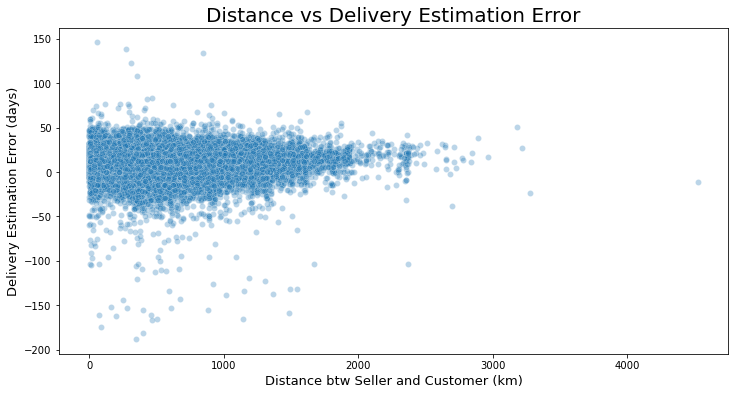

In [169]:
# Distance vs Estimation Error
plt.figure(figsize=(12,6))
sns.scatterplot(data = distance_delivery, x = 'distance', y = 'estimated_delivery_date_error(d)', alpha=0.3)
plt.title('Distance vs Delivery Estimation Error', fontsize=20)
plt.xlabel('Distance btw Seller and Customer (km)', fontsize=13)
plt.ylabel('Delivery Estimation Error (days)', fontsize=13)
plt.ticklabel_format(style='plain')
plt.show()

* <b> Horizontal scatterplot. </b>
    - There is no significant relationship between seller-customer distance and accuracy of estimated delivery date
    - The company provides the estimated delivery date with a similar level of accuracy, no matter how far away the seller and buyer are.
    
* <b> Note. </b>
    - Delivery Estimation Error = 0 days means that the ordered item is delivered on the exact same day as the estimated delivery date. Most cases are concentrated on 0 days while ranging from 50 to -50 days. 
    - Even some cases with distances over 2000km are maintained along the 0 days level.

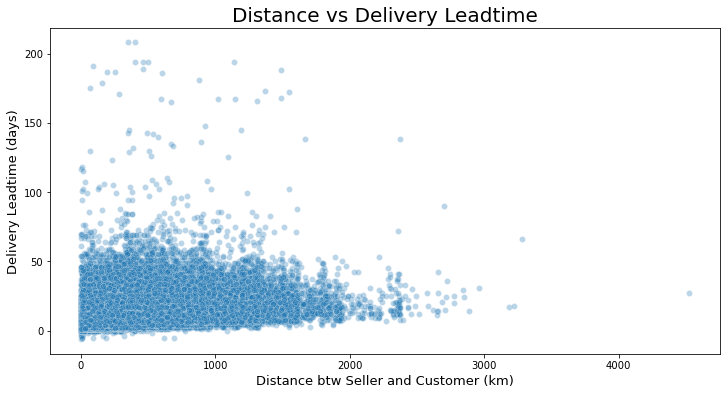

In [171]:
# Distance vs Delivery Lead Time
plt.figure(figsize=(12,6))
sns.scatterplot(data = distance_delivery, x = 'distance', y = 'delivery_leadtime(d)', alpha=0.3)
plt.title('Distance vs Delivery Leadtime', fontsize=20)
plt.xlabel('Distance btw Seller and Customer (km)', fontsize=13)
plt.ylabel('Delivery Leadtime (days)', fontsize=13)
plt.show()

* <b> Slight positive scatterplot. </b>
    - There is positive relationship between seller-customer distance and delivery leadtime
    - Longer distance between seller and buyer is more likely to result in longer delivery leadtime.
    
* <b> Note. </b>
    - The longest distance with nearly 5000km has less than 50 days of delivery lead time. Nevertheless, there are many cases that have shorter than 1000km of distance but took more than 50 days to be delivered to customers. 
    - It reflects that other factors other than seller-customer distance have more significant impacts on delivery lead time. Those could be the seller's personal issue, weather, logistics company's issue, etc.

In [174]:
distance_delivery.head()

,order_id,distance,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at,estimated_delivery_date_error(d),delivery_leadtime(d)
0,e481f51cbdc54678b7cc49136f2d6af7,15.893201,2017-10-10 21:25:13,2017-10-18,2017-10-02 11:07:15,7,8
1,53cdb2fc8bc7dce0b6741e2150273451,77.078936,2018-08-07 15:27:45,2018-08-13,2018-07-26 03:24:27,5,12
2,47770eb9100c2d0c44946d9cf07ec65d,32.952717,2018-08-17 18:06:29,2018-09-04,2018-08-08 08:55:23,17,9
3,949d5b44dbf5de918fe9c16f97b45f8a,962.540086,2017-12-02 00:28:42,2017-12-15,2017-11-18 19:45:59,12,13
4,ad21c59c0840e6cb83a9ceb5573f8159,28.081854,2018-02-16 18:17:02,2018-02-26,2018-02-13 22:20:29,9,2


In [175]:
corr = distance_delivery.corr(method='pearson')
corr

,distance,estimated_delivery_date_error(d),delivery_leadtime(d)
distance,1.000000,0.073980,0.340967
estimated_delivery_date_error(d),0.073980,1.000000,-0.598011
delivery_leadtime(d),0.340967,-0.598011,1.000000


Text(0.5, 1.0, 'Correlation')

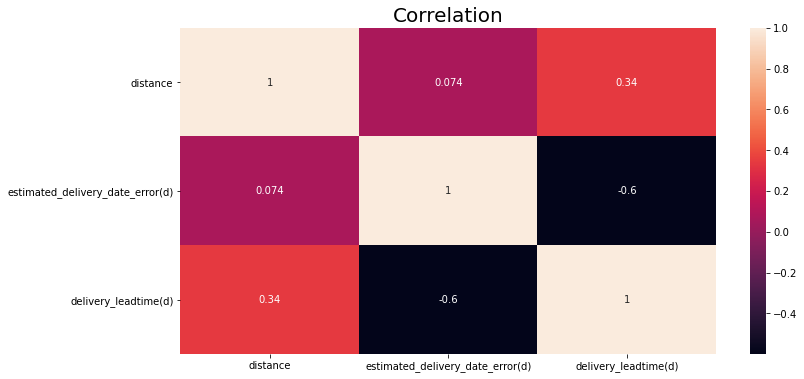

In [179]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation', fontsize=20)

* <b> Correlation </b>
    - Distance vs Estimated Delivery Error: No relationship
    - Distance vs Delivery Leadtime: Slight positive relationship
    - Estimated Delivery Error vs Delivery Leadtime: <b> Negative relationship </b>
        - Long delivery leadtime tends to have more accurate estimated delivery date.